In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
date = session.query(measurement.date).order_by(measurement.date.desc()).limit(1)

for x in date:
    print(x)


('2017-08-23',)


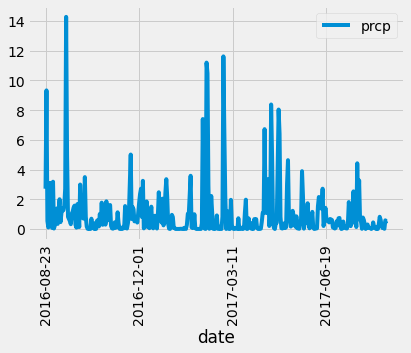

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

#Date one year from latest date in data set: 2016-08-23

# Perform a query to retrieve the data and precipitation scores

sel_md = [measurement.date, func.sum(measurement.prcp)]

prcp_date_data = session.query(*sel_md).filter(measurement.date >= '2016-08-23').group_by(measurement.date).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df2 = pd.DataFrame(prcp_date_data, columns = ['date', 'prcp'])
df2.set_index('date', inplace=True)


plot = df2.plot(rot=90)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df2.agg(
    {
        "prcp": ["min", "max", "median", "mean"]
    }
)

,prcp
min,0.000000
max,14.280000
median,0.405000
mean,0.978907


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
tot_stations = session.query(station).count()
print(f'Total Stations: {tot_stations}')

Total Stations: 9


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

#station_counts = session.query(measurement.station, func.count(measurement.prcp).group_by(measurement.station))
sel = [measurement.station, func.count(measurement.station)]

station_counts = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

# print(station_counts)
for x in station_counts:
    print(x)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

temp_summary = session.query(*sel).filter(measurement.station == 'USC00519281')
for x in temp_summary:
    print(x)
    
temp_summary_df = pd.DataFrame(temp_summary, columns = ['Station ID', 'Min Temp', 'Max Temp', 'Average Temp'])

temp_summary_df

('USC00519281', 54.0, 85.0, 71.66378066378067)


,Station ID,Min Temp,Max Temp,Average Temp
0,USC00519281,54.0,85.0,71.663781


Text(0, 0.5, 'Frequency')

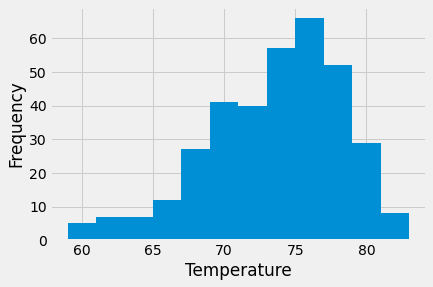

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [measurement.station, measurement.tobs, measurement.date]
full_temp_data = session.query(*sel).filter((measurement.station == 'USC00519281') & (measurement.date > '2016-08-23'))

    
df_hist = pd.DataFrame(full_temp_data, columns = ['Station ID', 'Temperature', 'Date'])

hist_vals = df_hist['Temperature']


hist_plot = plt.hist(hist_vals, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close session

In [17]:
# Close Session
session.close()